In [1]:
import pandas as pd
import numpy as np
from scipy.stats import kstest,ttest_ind
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 7, 'ytick.major.width': 1.5, 'ytick.major.size': 7})
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
def save_pdf(save_file, fig):
    pdf = PdfPages(save_file)
    pdf.savefig(fig, bbox_inches='tight')
    pdf.close()
    return

In [3]:
valid_file = "../data/validation/valid_mean.csv"
valid_df = pd.read_csv(valid_file)

In [5]:
valid_df.vtype.value_counts()

No combinations    32687
Combinations         231
Name: vtype, dtype: int64

# BMI comparison between individuals with and without the combinations in a non-white british cohort

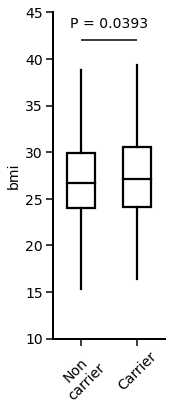

In [7]:
boxdf = valid_df

# Define Canvas
fig,ax = plt.subplots(1, 1, figsize=(2, 6))

# Box Plot
# sns_strip = sns.stripplot(
#     data=boxdf,
#     palette=["#00ADEE", "#c1272d", ],  # '#D1245D', '#00ADEE', '#D1245D', '#00ADEE' "#0000a7"
#     x="vtype",
#     y="bmi",
#     order=["No combinations", "Combinations"],
#     hue_order=["No combinations", "Combinations"],
#     orient="v",
#     s=1,
#     marker="o",
#     # fillstyle="none",
#     alpha=0.5, ec='black', linewidth=0, facecolor=(0,0,0,0), dodge=False, ax=ax,  jitter=0.25, 
#     )

sns_box = sns.boxplot(
    data=boxdf,
    x="vtype",
    y="bmi",
    order=["No combinations", "Combinations"],
    hue_order=["No combinations", "Combinations"],
    dodge=False, width=0.5, linewidth=2.25, fliersize=0, capprops={'color':'none'}, boxprops={'facecolor':'none', 'edgecolor':'k'}, whiskerprops={'color':'k'}, medianprops={'color':'k'}) # 


# Adjust Axis
# ax.set_yticks([-0.02, 0, 0.02, 0.04])
ax.set_ylim((10, 45))
# ax.set_ylabel('Percentage')
ax.set_xticklabels(["Non\ncarrier", "Carrier"], rotation=45, ha="center", fontsize=14)
ax.set_xlabel("")
ax.hlines(42, 0, 1, color="k")
ax.text(0.5, 43, "P = 0.0393", ha="center", va="bottom", fontsize=14)

# Remove Spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);

In [8]:
save_file = "/data5/deepro/ukbiobank/papers/bmi_project/4_characterization/white_british/data/validation/nonwhite_comparison.pdf"
save_pdf(save_file, fig)

[Text(0, 0, 'No\ncombinations'), Text(1, 0, 'Combinations')]

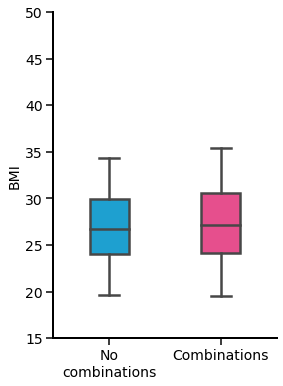

In [4]:
boxdf = valid_df


# Define Canvas
fig,ax = plt.subplots(1, 1, figsize=(4, 6))

# Box Plot
sns_ax = sns.boxplot(
    data=boxdf,
    palette=["#00ADEE", "#FF3688"],  # "#eecc16", "#008176" '#D1245D', '#00ADEE', '#D1245D', '#00ADEE' "#0000a7"
    x="vtype",
    y="bmi",
    orient="v",
    width=0.35,
    linewidth=2.5,
    fliersize=0.00,
    whis=0.75,
    ax=ax

    )

ax.set_xlabel("")
ax.set_ylabel("BMI")
ax.set_ylim(15, 50)
ax.spines[['right', 'top']].set_visible(False)
ax.set_xticklabels(["No\ncombinations", "Combinations", ], rotation=0)

In [5]:
combo_hit_pheno = valid_df.loc[valid_df.vtype=="Combinations"]
non_combo_hit_pheno = valid_df.loc[valid_df.vtype=="No combinations"]

In [6]:
ttest_ind(non_combo_hit_pheno.bmi, combo_hit_pheno.bmi, alternative="less"), kstest(non_combo_hit_pheno.bmi, combo_hit_pheno.bmi, alternative="greater")

(Ttest_indResult(statistic=-1.7590782682697255, pvalue=0.03928675272946077),
 KstestResult(statistic=0.06284307263289723, pvalue=0.15661886979877007))